#                                SMS Spam Classification

⌚Time Stamps⌚

00:00 - Intro
00:54 - Project Demo
02:50 - UCI ML Dataset
04:41 - Creating Jupyter Notebook/Checking The Data
05:55 - Stages of the Project
07:30 - Data Cleaning
12:20 - EDA
29:17 - Text Preprocessing
54:25 - Model Building
01:09:17 - Improving model performance
01:20:20 - Creating the project in Pycharm
01:33:00 - Deployment on Heroku
01:39:30 - Outro

In [70]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [71]:
# imported the data_sets
df= pd.read_csv("spam1.csv", encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [72]:
# df.isnull().sum() # so sure that we've to delete these unnamed columns

#                                        Data cleaning

In [73]:
# drop the last 3 cols
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

# we've to drop it into its variable except another one.

df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
# printed its sample
df.sample(5)

,v1,v2
1251,spam,Please CALL 08712402779 immediately as there i...
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...
2913,spam,Sorry! U can not unsubscribe yet. THE MOB offe...
2368,ham,If you r @ home then come down within 5 min
504,spam,+123 Congratulations - in this week's competit...


In [75]:
# note: v1 and v2 are not good to understand so rename it.

# just rename the cols.
df.rename(columns={'v1': "Target", 'v2': 'Spam_Ham'}, inplace= True) #key:pair(using -> dict.)
df.sample()

,Target,Spam_Ham
2110,ham,Do we have any spare power supplies


In [76]:
# better to do analysis, we've to use frequently wherever going to import the data
#shape
#reshape
#rows/cols
#

<h1>Extra work done</h1>

In [77]:
# df.head(4)
df["Target"].value_counts()

Target
ham     4825
spam     747
Name: count, dtype: int64

#                  sk_learn_lib

In [78]:
#imported the sk_learn library
from sklearn.preprocessing import LabelEncoder # class -> LabelEncoder

# note: what's is LabelEncorder(class) -> encorded or fetch 0/1 from the lib.
# Certainly! Here's an explanation of the LabelEncoder from sklearn.preprocessing in points:

# Purpose: The LabelEncoder is a utility class in the sklearn.preprocessing module that is used for encoding categorical labels as integer values.

# Categorical Data Handling: In machine learning, many algorithms cannot directly handle categorical data, which includes textual labels such as "red," "green," "blue," etc. These labels need to be converted into numerical representations for the algorithms to work effectively.

# Encoding Labels: LabelEncoder converts categorical labels into numerical values. It assigns a unique integer to each label in the dataset. For example, if you have labels like "cat," "dog," and "bird," LabelEncoder will map them to integers like 0, 1, and 2, respectively.

# Ordinal Encoding: LabelEncoder performs ordinal encoding, which means it assigns integers to labels based on the order in which they are encountered in the dataset. It does not assume any specific ordering of the labels but simply assigns a unique integer to each distinct label.


encoder = LabelEncoder() #the class
df["Target"] = encoder.fit_transform(df["Target"])

# printed it.
df.head()
df.info

<bound method DataFrame.info of       Target                                           Spam_Ham
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [79]:
# checked the missing values
df.isnull().sum()

Target      0
Spam_Ham    0
dtype: int64

In [80]:
# checked duplicated values
df.duplicated().sum()

403

In [81]:
#so removing the duplicated values first of that.
df= df.drop_duplicates(keep= "first")

# # note: Here's what each option for the keep parameter does:

# "first": This option keeps the first occurrence of a duplicated row and drops all subsequent occurrences. So, if there are multiple rows with the same values, only the first one encountered will be kept, and the rest will be dropped.

# "last": This option keeps the last occurrence of a duplicated row and drops all previous occurrences. If there are multiple rows with the same values, only the last one encountered will be kept, and the rest will be dropped.

# False: This option drops all duplicates, regardless of their order.


# so finally removed duplicates.
df.duplicated().sum()

0

In [82]:
# now, checking its shape
df.shape

# this is the basis cleaning part has been figured out.

(5169, 2)

#                                      EDA

In [83]:
# to understading the data -> to perform EDA.
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

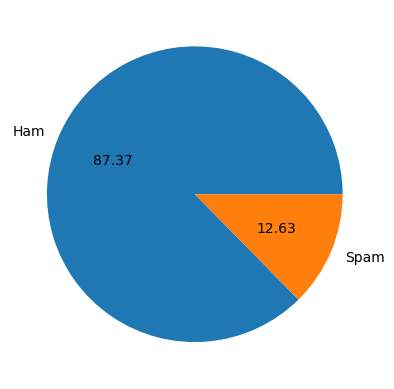

In [84]:
# imported matplotlib
import matplotlib.pyplot as a
a.pie(df["Target"].value_counts(), labels= ["Ham", "Spam"], autopct="%0.2f")
a.show()

# note: 
#     matplotlib.pyplot: This module provides a MATLAB-like interface for creating plots and visualizations in Python.

# <h1>after analyzed the data, Data is imbalanced ->
# ham -> 4516 # good messages
# spam -> 653 # not good.

<h1> Performed NLRK </h1>

In [86]:
# imported nltk lib
import nltk 

# its package
nltk.download('punkt')

# note:
#     nltk.download('punkt'): This line downloads the punkt tokenizer models. 
#         The punkt tokenizer is used for tokenizing (i.e., splitting) text into individual words or sentences.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
# df["Spam_Ham"].apply(len)

# to store it in new var
df["num_Characters"]= df["Spam_Ham"].apply(len)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14260\641999034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_Characters"]= df["Spam_Ham"].apply(len)


In [88]:
# re-run it.
df.head()

,Target,Spam_Ham,num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [89]:
# num of words

# breaking into workd of the sentences form of Spam_ham
# df["Spam_Ham"].apply(lambda x: nltk.word_tokenize(x))

# calculating sentences length
df["num_words"]= df["Spam_Ham"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14260\606482941.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]= df["Spam_Ham"].apply(lambda x: len(nltk.word_tokenize(x)))


In [90]:
df.head()

,Target,Spam_Ham,num_Characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [91]:
# num of sentences

# calculated its length.
df["num_sentences"]= df["Spam_Ham"].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14260\616130868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"]= df["Spam_Ham"].apply(lambda x: len(nltk.sent_tokenize(x)))


In [92]:
df.head()

,Target,Spam_Ham,num_Characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [93]:
#  to check description?(optional part to use it but you have to perform with numbers)
df[["num_Characters", 'num_words', 'num_sentences']].describe()

,num_Characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [94]:
# here is the prediction -> max
# num_Characters -> 910.00
# num_words -> 220
# num_sentences -> 38

<h1> Ham</h1>

In [95]:
#ham -> 0
df[df["Target"]==0] [["num_Characters", 'num_words', 'num_sentences']].describe()

,num_Characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [96]:
#  Also we do same thing with Spam messages
df[df["Target"]==1] [["num_Characters", 'num_words', 'num_sentences']].describe()

,num_Characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [97]:
# above the figure isn't good to understand perfectly, thereby going to make a graph plot -> histogram

In [98]:
# !pip install scikit-learn

C:\Users\lenovo\AnacondaFolder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\AnacondaFolder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_Characters', ylabel='Count'>

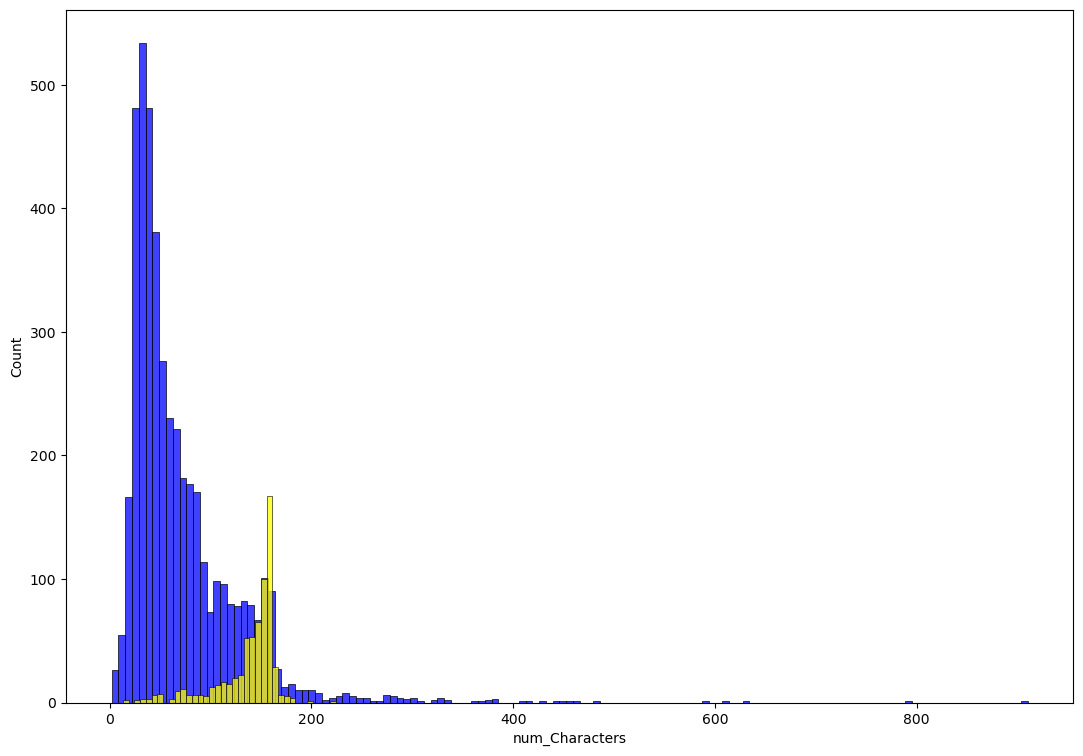

In [99]:
# so imported the seaborn lib

import seaborn as sns
import matplotlib.pyplot as plt


# into Histogram plot.
# sns.histplot(df  [df ["Target"] ==0]   ['num_Characters']  )


# here going to analysis both the stuffs based on their one num_Characters occurance.


# so that, to visable perfectly
plt.figure(figsize=(13, 9))
# Ham message
sns.histplot(df  [df ["Target"] == 0] ["num_Characters"], color= "blue")

# Spam message
sns.histplot(df [df["Target"] == 1] ["num_Characters"], color= "yellow")

# but it's not visable perfectly so ?

In [100]:
#print once again
df.head()

,Target,Spam_Ham,num_Characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


C:\Users\lenovo\AnacondaFolder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\AnacondaFolder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

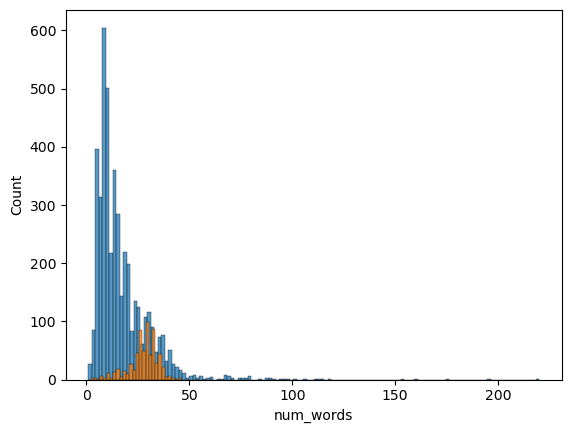

In [101]:
# also same thing, to do with words_counts or analysis

# Ham message
sns.histplot(df[df["Target"] == 0] ["num_words"])

#Spam
sns.histplot(df[df["Target"]== 1] ["num_words"])


C:\Users\lenovo\AnacondaFolder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\AnacondaFolder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\AnacondaFolder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


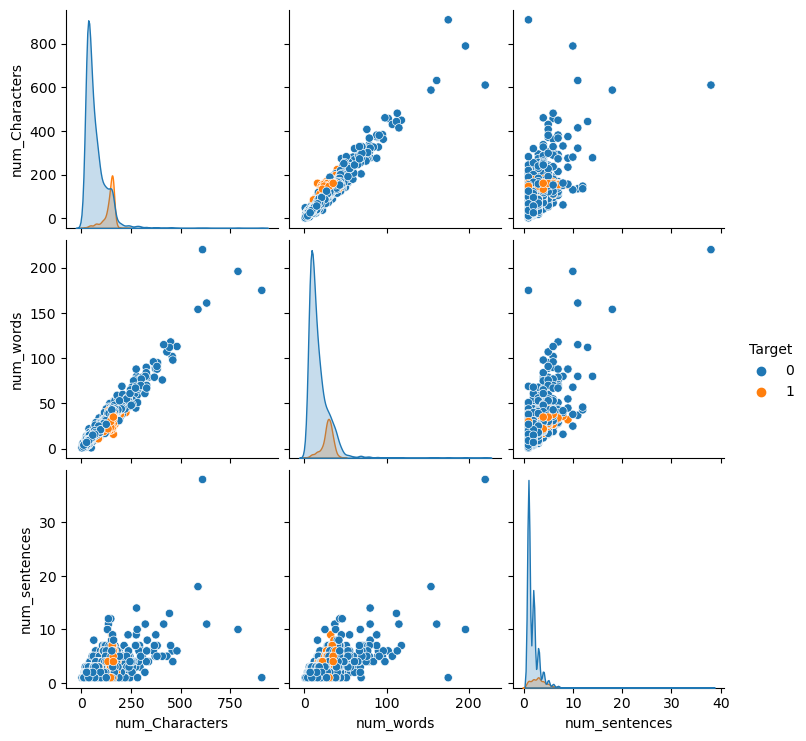

In [102]:
# let's figure out difference among the characters, words and sentences

# using pair_plot
sns.pairplot(df, hue="Target")

<b>ALert! <br>
The error ValueError: could not convert string to float occurs when trying to perform numerical operations on non-numerical data, such as text. In the context of computing correlations using corr(), this error suggests that your DataFrame contains non-numeric data.

In [103]:
# to predict the data, co-relation
df = df.select_dtypes(include=[float, int])

# what is the co-relation among them (0----1 b/w, it is good if close to 1)
df.corr()

,Target,num_Characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_Characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

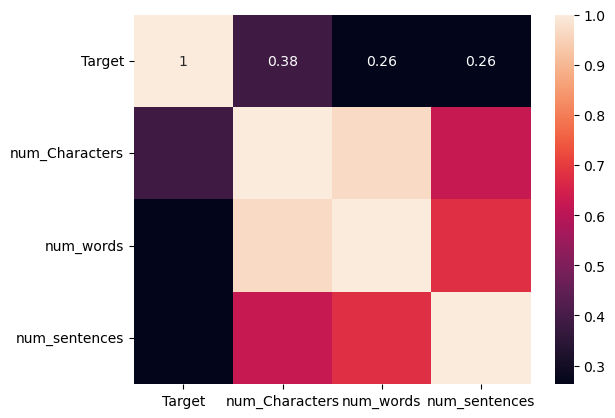

In [104]:
# OR 
#le's it into head_map
sns.heatmap(df.corr(), annot= True)

# note: annot -> to showing values after inserted annot.

#                               Data Preprocessing

<!-- lower case
Tokenization
Removing special characters
removing stop words and punctuation
stemming -->

In [105]:
# imported nltk.corpus -> checking stop words.


# before to runs stopwords, you've to make sure that first installed the import nltk then run it.
import nltk
nltk.download('stopwords')


#  then run it.
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [106]:
#  let's see punctuation mark?

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [118]:
# last one is

# import stemming -> removing special characters like: going instead of go, ... etc..

from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem("")

''

In [124]:
# 1 lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# stemming.

# we're taking 1 functin to convert it into lower case

# 2 Tokenization

# we're going 1 function to convert it into words_tokenization

# 1 -> for the lowe case
def Tran_Lw(text):
    text= text.lower()
    
# 2 -> for the word tokenization
    text= nltk.word_tokenize(text) #break_down the words from the sentences in list.
    
    
#    take an empty list.

# 3 -> for the special characters and punctuation stuffs.
    y= []
    
    for i in text:
        if i.isalnum(): # isalnum -> including lower words and numerical except special characters.
            y.append(i)
            
         
        
#   just copy once remove it.
    text=y[ : ]
    
#   y is empty now.
    y.clear()
    
# 4 -> for the stop words
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
# again as same for stemming
    text= y[:]
    y.clear()
    
    
# 5 -> for the stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


# statement 
Tran_Lw("Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx")

'okay name ur price long legal wen pick u ave x am xx'

In [125]:
df["Spam_Ham"][100]

KeyError: 'text'

In [115]:
# here, gonna to pass into new col

df["transformed_text"]= df["Spam_Ham"].apply(Tran_Lw)

KeyError: 'Spam_Ham'

In [ ]:
# now printed it.
df.head(5)

In [120]:
# now, we're going to use word cloud: pip install wordcloud

# note: word cloud is the marked important words and increasing size.

# imported here.

import wordcloud
from wordcloud.wordcloud import WordCloud

from wordcloud import WordCloud
wc= WordCloud(width= 1000, height= 500, min_font_size= 10, background_color= 'white')

In [121]:
# generate function calling.

# Spam message
spam_wc= wc.generate(df[df["Target"]== 1] ["transformed_text"].str.cat(sep=""))

KeyError: 'transformed_text'

In [ ]:
plt.imshow(spam_wc)

# finally removing these hightlight words to make it perfect so that maintain accuracy..

In [122]:
# Ham message

# import matplotlib.pyplot as plt


wc= WordCloud(width= 300, height= 300, min_font_size= 10, background_color= 'white')

ham_wc= wc.generate(df[df["Target"]== 0] ["transformed_text"].str.cat(sep=" "))

KeyError: 'transformed_text'

In [123]:
# showed
plt.figure(figsize=(5, 5))
plt.imshow(ham_wc)

NameError: name 'ham_wc' is not defined

<Figure size 500x500 with 0 Axes>

In [52]:
# now, we're going to analysis top 30 words in both spam and ham.

# so we need to custom code that is good practice to do.

In [ ]:
# le't see our data frame
df.tail()

In [ ]:
# now, we're going to figure out

# spam

# find then adding into a lisf form then iterated it.

# making a empty list

spam_corpus= [] # for appeding stuffs.

for msg in df[df["Target"]==1] ["transformed_text"].tolist():
#   here just, we split it 
    for word in msg.split():
#       then after appending it.
        spam_corpus.append(word) #appending words into spam_corpus

In [ ]:
# we just did speration form
len(spam_corpus)

# now, we're going to remove and try to reduce this number so that maintain data set accuracy.

In [ ]:
# it just creats dict form, like how many times a particular word occured.

# imported the lib
from collections import Counter

# exactly wanted to find -> top most 30 words occurance in spam messages.
# Counter(spam_corpus).most_common(30)

In [ ]:
# and now, we just add it into a dataFrame

# pd.DataFrame(Counter(spam_corpus).most_common(30))

In [ ]:
# now, we're ploting it into a bar-plot

# so ?
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# for reading purpose
plt.xticks(rotation= "vertical")

# show
plt.show()

In [ ]:
# even through, we can make our project without above the analysis but it's good practice to do and 
# show your analysis and presentation.

<h1> same process for the ham</h1>

In [55]:
# imported the lib
from collections import Counter


# now, we do as same for the ham messages

# taking an empty list
ham_corpus=[]

# first: covert into a list then in loop
for msg in df[df["Target"]==0] ["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [56]:
len(ham_corpus)

35404

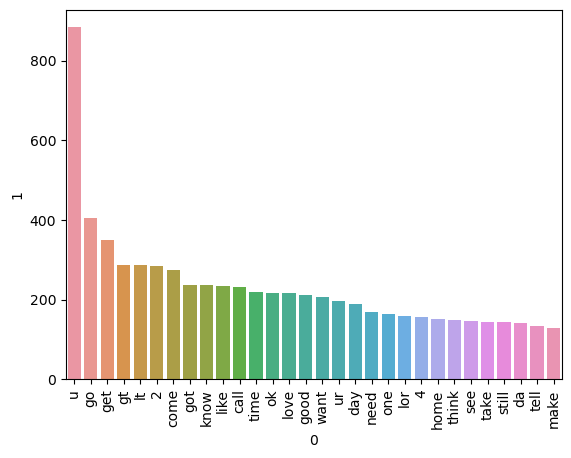

In [57]:
# show in bar-plot
# imported the lib
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

# for reading purpose
plt.xticks(rotation= "vertical")

plt.show()

#                                  Model building ( final )

<!-- 
 we will try analysis different different algorithem of the machine learning then we see which one is more acurate.-->
 

In [58]:
# finally, we're building a machine leaning model

# that's perform certain operations

# naive baye
# (TF-IDF)

In [59]:
# note:
    
# The "naive algorithm"

# likely refers to the Naive Bayes algorithm, which is a simple but effective machine learning algorithm for classification tasks. It's based on Bayes' theorem with the assumption of independence between features. Despite its simplicity, Naive Bayes can often perform well in practice, especially for tasks where the independence assumption holds reasonably well, such as text classification and spam filtering.

# In essence, Naive Bayes calculates the probability of a given data point belonging to each class based on the features of that data point. It then assigns the data point to the class with the highest probability.

# The "naive" part of its name comes from the assumption of feature independence, which means that the presence of a particular feature in a class is unrelated to the presence of any other feature. While this assumption is often violated in real-world data, Naive Bayes can still perform well, especially with large datasets.

# Naive Bayes algorithms come in different variants, such as Gaussian Naive Bayes for continuous features, Multinomial Naive Bayes for discrete features (e.g., word counts), and Bernoulli Naive Bayes for binary features. Each variant is suited to different types of data.


# The "Bag of Words"

# (BoW) model is a commonly used technique in natural language processing (NLP) and information retrieval for representing text data. In this model, a document is represented as a collection or "bag" of words, disregarding grammar and word order but maintaining multiplicity. 

# Here's how the Bag of Words model works:

# 1. **Tokenization**: The text is first tokenized, breaking it down into individual words or terms. Punctuation and other non-alphanumeric characters are typically removed, and words are converted to lowercase to ensure consistency.

# 2. **Vocabulary Construction**: A vocabulary, or dictionary, is created from the unique words found in the corpus (collection of documents). Each word in the vocabulary is assigned a unique index.

# 3. **Vectorization**: Each document is then represented as a numerical vector, where each element corresponds to the count of a word from the vocabulary in the document. This can also be done using other metrics such as term frequency-inverse document frequency (TF-IDF), which weights the importance of words based on their frequency across documents.

# 4. **Sparse Representation**: Since most documents only contain a small subset of the words in the vocabulary, the resulting vectors are usually sparse, meaning most of the elements are zero.

# The Bag of Words model is a simple yet effective way to represent text data for tasks such as document classification, sentiment analysis, and information retrieval. However, it does not capture the semantic meaning or context of words, and it treats each word as independent, which can limit its effectiveness in capturing the nuances of language. Despite its limitations, the Bag of Words model is widely used as a baseline in many NLP applications.

In [60]:
#  one of the most algorithem -> naive bayes 

In [61]:
# note: there are 2,3 solution to convert string into vectorization
# bag of words -> frequently words occurance.
# vectorization -> 
# TF- IDF ->
#     first:
#         we're going to vectrization (string into numerical coverted it.)

In [62]:
# step: 1
#     data -> vectorization using 'bag of words'
    
# step: naive bayes -> as input


# CountVectorizer -> "bag of words"

# TF-IDF -> vectorizer

In [63]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# # based on 'bag of words -> CountVectorizer'
# # cv= CountVectorizer()

# # TfidfVectorizer
# tidf= TfidfVectorizer()

In [64]:
# model improvement:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# instead of taking 5160 approx, 3000 words only.

# hit and trial method

# very important part to understand it.
tidf = TfidfVectorizer(max_features=3000) #best selection after checking the model improvements.

In [65]:
# transfer the data.

# CountVectorizer
# X = cv.fit_transform(df['transformed_text']).toarray()

# tidf
X= tidf.fit_transform(df["transformed_text"]).toarray()

In [66]:
# print x
# X

# checking its shape
X.shape

(5169, 3000)

In [67]:
# problem faced: why its column part 3000 ?

In [68]:
df.head(100)

,Target,Spam_Ham,num_Characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
95,1,Your free ringtone is waiting to be collected....,125,26,4,free rington wait collect simpli text password...
96,0,Watching telugu movie..wat abt u?,33,8,1,watch telugu movi wat abt u
97,0,i see. When we finish we have loads of loans t...,51,13,2,see finish load loan pay
98,0,Hi. Wk been ok - on hols now! Yes on for a bit...,184,47,5,hi wk ok hol ye bit run forgot hairdress appoi...


In [69]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [70]:
# extract 'Y'
y = df['Target'].values

# print it.
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
# train test apply

# very amazing lib & train test split -> youtube..
from sklearn.model_selection import train_test_split

In [72]:
# different different model, sci-py libarary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [73]:
# calling algorithems

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# note:
# In the context of machine learning algorithms, "metrics" typically refer to evaluation measures used to assess
# the performance of a model. These metrics help to quantify how well a model is performing in terms of various
# aspects such as accuracy, precision, recall, F1-score, etc. Here are some common metrics used in machine learning:

# imported it
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

shortkey- Esc + 1,2 3
# Vital Interview questions -> differenciates

In [74]:
# passing these algo -> into a variable

gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

#   # we're going to train this model (Interview purpose very important)

<!--it is fine to code but above the part very important  -->

# to understand overall comparing differents part 

In [75]:
# 1. Gaussian naive bayes -> model

# accuracy
gnb.fit(X_train, y_train)

# prediction score
y_predict1= gnb.predict(X_test)

#score printing
# first: accuracy_score

print("Accuracy_Score: ",accuracy_score(y_test, y_predict1))

# second: confusion_matrix
print("Confusion_Matrix: ", confusion_matrix(y_test, y_predict1))

# third: precision_score
print("Precision_Score: ",precision_score(y_test, y_predict1))

# note: very bad performation.

Accuracy_Score:  0.8694390715667312
Confusion_Matrix:  [[788 108]
 [ 27 111]]
Precision_Score:  0.5068493150684932


In [76]:
# let's second -> Maltinomial_NB

# performing accuracy
mnb.fit(X_train, y_train)

# precision 
y_predict2= mnb.predict(X_test)

# printing again 
print("Accuracy_score:", accuracy_score(y_test, y_predict2))
print("confusion_matrix:", confusion_matrix(y_test, y_predict2))
print("precision_score:", precision_score(y_test, y_predict2))

Accuracy_score: 0.9709864603481625
confusion_matrix: [[896   0]
 [ 30 108]]
precision_score: 1.0


In [77]:
# let's check last one is bernoulli nb

# accuracy
bnb.fit(X_train, y_train)

# precision
y_predict3 = bnb.predict(X_test)

# printing the one
print("Accuracy: ", accuracy_score(y_test, y_predict3))
print("Confusion_matrix:", confusion_matrix(y_test, y_predict3))
print("Precision_score:", precision_score(y_test, y_predict3))

Accuracy:  0.9835589941972921
Confusion_matrix: [[895   1]
 [ 16 122]]
Precision_score: 0.991869918699187


In [78]:
# 1 decided -> based on the performation
# bernoulliNB, MultinomialNB-> best
# precision_best -> multinomialNB (tidf-> choised)

In [79]:
# let's take sklearn all algorithems

# pending to performs certains algorithems

In [80]:
# based on the accuracy try to imrove it on our model.

#                                Model improvement

<!--
  What i faced during improvement the model.-->

In [81]:
# 1. change max_feature parameter of tidf

In [82]:
#                 "Congrats!"",         that we have learned our first project of based on machine learning(DS)"

In [83]:
# 1

In [84]:
# we're going to create a pipeline

In [85]:
# summary:
    
# # 1.preprocessing(text transformation)

# 2. vectorization

# 3. algorithem apply

In [86]:
# 2 file pickle

In [88]:
import pickle

# first: tidf -> vectorizer
pickle.dump(tidf, open('vectorizer2.pkl', 'wb'))

# second: 
pickle.dump(bnb, open('modelimprovement2.pkl', 'wb'))

# once to move ahead, checking first everthing is working fine or not?

<h1> Final step of it</h1> Hurry!

Based on machine learning model -> i performed different different hit and trial method for the precision score and accuracy,
where i choiced before the priority presion more than accuracy ?

but i faced building and best fitting of machine model algo based on precision

<h4>run 3 most resulted machine algorithm then after performed and corrected based on accuracy</h4>

1.gnb= GaussianNB()-> perfomed very less

2.mnb= MultinomialNB() -> performed best fit but lack in accuracy after hint and trial method so that finally i choiced

after different different hint and trial method of machine learning -> before -> after

<h2>-> before                                                after finally improved the model</h2>

Accuracy_score: 0.9709864603481625 ----------------->    Accuracy_score:  0.9835589941972921                                                   
precision_score: 1.0               ----------------->    Precision_score: 0.991869918699187
        
        
        that is working good than previous(multinomial algorithem)





bnb= BernoulliNB()


#          Finally - Pipeline it, into Stremlit (API)

Carefully!
Date: 28/02/2024

1. Using Streamlit (API)

2. Pipe within it.

3. Run Pycharm IDE.

HINT- Campusx (If you faced any problem related to it.)
link YouTube - https://youtu.be/YncZ0WwxyzU?si=fZA44M_L_uGlRNPK

In [ ]:
# # importing streamlit
# import streamlit as st
# import pickle

# #importing nltk (word_tokenization)
# from nltk.corpus import stopwords
# import nltk
# # nltk.download('stopwords') // optional

# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

# # stopwords.words("english")

# # importing string
# import string
# # string.punctuation


# # pickle
# import pickle
# # last one -> ps package installed
# # 1 lower case
# # Tokenization
# # Removing special characters
# # Removing stop words and punctuation
# # stemming.

# # we're taking 1 functin to convert it into lower case

# # 2 Tokenization

# # we're going 1 function to convert it into words_tokenization

# # 1 -> for the lowe case
# def Tran_Lw(text):
#     text = text.lower()

#     # 2 -> for the word tokenization
#     text = nltk.word_tokenize(text)  # break_down the words from the sentences in list.

#     #    take an empty list.

#     # 3 -> for the special characters and punctuation stuffs.
#     y = []

#     for i in text:
#         if i.isalnum():  # isalnum -> including lower words and numerical except special characters.
#             y.append(i)

#     #   just copy once remove it.
#     text = y[:]

#     #   y is empty now.
#     y.clear()

#     # 4 -> for the stop words
#     for i in text:
#         if i not in stopwords.words("english") and i not in string.punctuation:
#             y.append(i)

#     # again as same for stemming
#     text = y[:]
#     y.clear()

#     # 5 -> for the stemming
#     for i in text:
#         y.append(ps.stem(i))

#     return " ".join(y)

# # sample_exe:
# # Tran_Lw("Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx")


# # loaded tidf

# tidf= pickle.load(open('vectorizer.pkl', 'rb')) #read binay mode

# # loaded mode
# model = pickle.load(open('model.pkl', 'rb'))

# # title
# st.title("SMS Spam Identifier")

# # input
# input_sms= st.text_area("Enter the message")
# # added button
# if st.button("Predict"):

#     # Now, there are 4 steps processes
#     # 1. preprocessing
#     transformed_sms = Tran_Lw(input_sms)

#     # 2. vectorizer
#     vector_input = tidf.transform([transformed_sms]) #passing in a list.

#     # 3. predict
#     result = model.predict(vector_input)[0]

#     # 4. display
#     if result == 1:
#         st.header("Spam")
#     else:
#         st.header("Not Spam")

 # Others-> during what i faced to pipeline it, it's optional part at the end.

In [ ]:
# documentati0n

# -> streamlit app

i faced issue regarding how to approach .pkl file and pipe line it to streamlit dashboard (frame-work)

<h1> Exact code of Pycharm -> due to not running because of i couldn't pipe line it proper.</h1>

In [ ]:
# !pip install streamlit

In [ ]:
# # importing streamlit
# import streamlit as st
# import pickle

# #importing nltk (word_tokenization)
# from nltk.corpus import stopwords
# import nltk
# # nltk.download('stopwords');// optional

# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

# # stopwords.words("english")

# # importing string
# import string
# # string.punctuation


# # pickle
# import pickle

# last one -> ps package installed
# 1 lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# stemming.

# we're taking 1 functin to convert it into lower case

# 2 Tokenization

# we're going 1 function to convert it into words_tokenization

# 1 -> for the lowe case


In [ ]:
# def Tran_Lw(text):
#     text = text.lower()

#     # 2 -> for the word tokenization
#     text = nltk.word_tokenize(text)  # break_down the words from the sentences in list.

#     #    take an empty list.

#     # 3 -> for the special characters and punctuation stuffs.
#     y = []

#     for i in text:
#         if i.isalnum():  # isalnum -> including lower words and numerical except special characters.
#             y.append(i)

#     #   just copy once remove it.
#     text = y[:]

#     #   y is empty now.
#     y.clear()

#     # 4 -> for the stop words
#     for i in text:
#         if i not in stopwords.words("english") and i not in string.punctuation:
#             y.append(i)

#     # again as same for stemming
#     text = y[:]
#     y.clear()

#     # 5 -> for the stemming
#     for i in text:
#         y.append(ps.stem(i))

#     return " ".join(y)

# sample_exe:
# Tran_Lw("Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx")

In [ ]:
# # loaded tidf

# tidf= pickle.load(open('vectorizer.pkl', 'rb')) #read binay mode

# # loaded mode
# model = pickle.load(open('model.pkl', 'rb'))

# # title
# st.title("E-mail/SMS Spam Classifier")

# # input
# input_sms= st.text_input("Enter the message")

In [ ]:
# # Now, there are 4 steps processes
# # 1. preprocessing
# transformed_sms = Tran_Lw(input_sms)

# # 2. vectorizer
# vector_input = tidf.transform([transformed_sms]) #passing in a list.

# # 3. predict
# result = model.predict(vector_input)[0]

# # 4. display
# if result == 1:
#     st.header("Spam")
# else:
#     st.header("Not Spam")

In [ ]:
# import pickle

In [ ]:
# to check jupyter notebook version

# import notebook
# notebook.__version__